In [140]:
import warnings
warnings.simplefilter('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
get_ipython().magic('matplotlib inline')

import numpy as np
import scipy as sp
import scipy.signal as signal
import pandas as pd
import sklearn as sk
import tensorflow as tf
import wfdb

In [141]:
f = open("mit-bih-arrhythmia-database-1.0.0/RECORDS", 'r')
records = []
while True:
    line = f.readline()
    if not line: break
    records.append(line[:-1])
f.close()
print(records)

['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]
{'fs': 360, 'sig_len': 650000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V5'], 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}


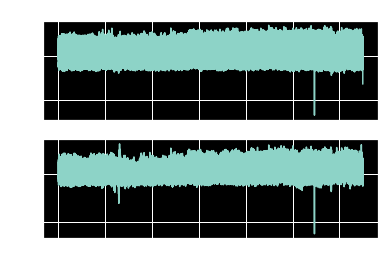

In [142]:
signals100, fields100 = wfdb.rdsamp('mit-bih-arrhythmia-database-1.0.0/'+'100')
print(signals100)
print(fields100)
wfdb.plot_items(signal = signals100, title = 'sample100')

In [143]:
# 각각의 레코드에 저장된 데이터들을 취합
signals = []
fields = []
for i in range(len(records)):
    globals()['signals{}'.format(records[i])] , globals()['fields{}'.format(records[i])] = wfdb.rdsamp('mit-bih-arrhythmia-database-1.0.0/'+str(records[i]))
    signals.append(globals()['signals{}'.format(records[i])])
    fields.append(globals()['fields{}'.format(records[i])])

In [144]:
# MLII로 측정한 신호가 없는 레코드는 제외
for record in records:
    if 'MLII' in globals()['fields{}'.format(record)]['sig_name']:
        pass
    else: records.remove(str(record))
print(records)

['100', '101', '103', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


In [145]:
# index는 환자 번호, column이 timestamp, data는 MLII 전압인 dataframe 생성
dfs = []
for signal in signals:
    dfs.append(pd.DataFrame(signal))

dfs_signals = pd.DataFrame(columns = range(650000))
for i in range(len(records)):
    ind = globals()['fields{}'.format(records[i])]['sig_name'].index('MLII')
    dfs_signals.loc[records[i]] = dfs[i][ind]
dfs_signals

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,649940,649941,649942,649943,649944,649945,649946,649947,649948,649949,649950,649951,649952,649953,649954,649955,649956,649957,649958,649959,649960,649961,649962,649963,649964,649965,649966,649967,649968,649969,649970,649971,649972,649973,649974,649975,649976,649977,649978,649979,649980,649981,649982,649983,649984,649985,649986,649987,649988,649989,649990,649991,649992,649993,649994,649995,649996,649997,649998,649999
100,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,-0.145,-0.150,-0.160,-0.155,-0.160,-0.175,-0.180,-0.185,-0.170,-0.155,-0.175,-0.180,-0.190,-0.180,-0.155,-0.135,-0.155,-0.190,-0.205,-0.235,-0.225,-0.245,-0.250,-0.260,-0.275,-0.275,-0.275,-0.265,-0.255,-0.265,-0.275,-0.290,-0.290,-0.290,-0.290,-0.285,-0.295,-0.305,-0.285,-0.275,-0.275,-0.280,-0.285,-0.305,-0.290,-0.300,-0.280,-0.290,-0.300,-0.315,...,-0.355,-0.335,-0.325,-0.335,-0.370,-0.420,-0.450,-0.435,-0.425,-0.450,-0.480,-0.510,-0.540,-0.560,-0.565,-0.545,-0.540,-0.540,-0.540,-0.535,-0.530,-0.540,-0.555,-0.555,-0.570,-0.570,-0.545,-0.525,-0.525,-0.535,-0.545,-0.545,-0.555,-0.580,-0.605,-0.645,-0.675,-0.705,-0.730,-0.745,-0.815,-0.815,-0.730,-0.615,-0.455,-0.300,-0.115,0.095,0.380,0.645,0.825,0.920,0.895,0.720,0.375,-0.075,-0.445,-0.675,-0.765,-1.28
101,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,-0.320,-0.320,-0.325,-0.330,-0.325,-0.315,-0.305,-0.300,-0.315,-0.320,-0.315,-0.300,-0.290,-0.290,-0.295,-0.290,-0.295,-0.285,-0.255,-0.230,-0.200,-0.195,-0.160,-0.160,-0.165,-0.200,-0.200,-0.210,-0.210,-0.205,-0.210,-0.210,-0.220,-0.250,-0.250,-0.250,-0.260,-0.265,-0.275,-0.305,-0.320,-0.330,-0.320,-0.320,-0.315,-0.340,-0.350,-0.335,-0.320,-0.310,-0.335,...,-0.285,-0.290,-0.300,-0.300,-0.295,-0.280,-0.280,-0.300,-0.300,-0.295,-0.305,-0.295,-0.280,-0.290,-0.290,-0.305,-0.290,-0.285,-0.290,-0.290,-0.295,-0.295,-0.280,-0.280,-0.275,-0.290,-0.300,-0.320,-0.305,-0.275,-0.285,-0.285,-0.295,-0.300,-0.300,-0.290,-0.290,-0.290,-0.290,-0.300,-0.295,-0.290,-0.295,-0.285,-0.300,-0.300,-0.305,-0.285,-0.285,-0.290,-0.300,-0.295,-0.285,-0.280,-0.285,-0.290,-0.295,-0.295,-0.290,0.00
103,-0.200,-0.200,-0.200,-0.200,-0.200,-0.200,-0.200,-0.200,-0.190,-0.175,-0.190,-0.205,-0.210,-0.200,-0.195,-0.210,-0.230,-0.235,-0.245,-0.235,-0.230,-0.230,-0.245,-0.270,-0.260,-0.240,-0.225,-0.220,-0.225,-0.225,-0.225,-0.225,-0.220,-0.235,-0.260,-0.260,-0.260,-0.260,-0.255,-0.255,-0.260,-0.260,-0.265,-0.250,-0.240,-0.255,-0.265,-0.280,-0.260,-0.255,-0.250,-0.245,-0.250,-0.255,-0.245,-0.240,-0.250,-0.245,-0.265,-0.270,...,-0.355,-0.350,-0.345,-0.340,-0.335,-0.335,-0.330,-0.325,-0.345,-0.340,-0.315,-0.290,-0.260,-0.260,-0.250,-0.265,-0.250,-0.250,-0.220,-0.220,-0.215,-0.210,-0.195,-0.190,-0.160,-0.155,-0.135,-0.140,-0.130,-0.105,-0.090,-0.090,-0.080,-0.090,-0.095,-0.080,-0.085,-0.075,-0.085,-0.085,-0.115,-0.110,-0.105,-0.095,-0.090,-0.105,-0.115,-0.120,-0.130,-0.125,-0.125,-0.145,-0.155,-0.155,-0.155,-0.160,-0.160,-0.170,-0.195,0.00
105,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.385,-0.385,-0.385,-0.380,-0.360,-0.360,-0.370,-0.365,-0.370,-0.360,-0.355,-0.345,-0.340,-0.345,-0.345,-0.330,-0.325,-0.310,-0.305,-0.310,-0.310,-0.300,-0.280,-0.250,-0.250,-0.245,-0.235,-0.220,-0.195,-0.165,-0.160,-0.160,-0.135,-0.120,-0.090,-0.060,-0.045,-0.035,-0.015,0.000,0.030,0.060,0.070,0.075,0.075,0.100,0.110,0.135,0.130,0.145,0.135,0.160,...,-0.350,-0.340,-0.330,-0.330,-0.335,-0.305,-0.295,-0.280,-0.275,-0.280,-0.270,-0.235,-0.215,-0.205,-0.195,-0.185,-0.160,-0.140,-0.130,-0.115,-0.110,-0.105,-0.080,-0.065,-0.045,-0.035,-0.025,-0.030,-0.015,0.000,0.025,0.020,0.020,0.020,0.030,0.050,0.055,0.045,0.045,0.035,0.035,0.035,0.035,0.005,-0.010,-0.025,-0.035,-0.050,-0.065,-0.085,-0.095,-0.125,-0.150,-0.165,-0.170,-0.200,-0.225,-0.235,-0.245,0.00
106,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.

In [146]:
dfs_signals.iloc[:,-1].value_counts()

 0.00    33
-1.28    10
 1.28     3
Name: 649999, dtype: int64

In [147]:
# 맨 끝부분 라벨은 제거
df_signals = dfs_signals.iloc[:, :-1]
df_signals

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,649939,649940,649941,649942,649943,649944,649945,649946,649947,649948,649949,649950,649951,649952,649953,649954,649955,649956,649957,649958,649959,649960,649961,649962,649963,649964,649965,649966,649967,649968,649969,649970,649971,649972,649973,649974,649975,649976,649977,649978,649979,649980,649981,649982,649983,649984,649985,649986,649987,649988,649989,649990,649991,649992,649993,649994,649995,649996,649997,649998
100,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,-0.145,-0.150,-0.160,-0.155,-0.160,-0.175,-0.180,-0.185,-0.170,-0.155,-0.175,-0.180,-0.190,-0.180,-0.155,-0.135,-0.155,-0.190,-0.205,-0.235,-0.225,-0.245,-0.250,-0.260,-0.275,-0.275,-0.275,-0.265,-0.255,-0.265,-0.275,-0.290,-0.290,-0.290,-0.290,-0.285,-0.295,-0.305,-0.285,-0.275,-0.275,-0.280,-0.285,-0.305,-0.290,-0.300,-0.280,-0.290,-0.300,-0.315,...,-0.365,-0.355,-0.335,-0.325,-0.335,-0.370,-0.420,-0.450,-0.435,-0.425,-0.450,-0.480,-0.510,-0.540,-0.560,-0.565,-0.545,-0.540,-0.540,-0.540,-0.535,-0.530,-0.540,-0.555,-0.555,-0.570,-0.570,-0.545,-0.525,-0.525,-0.535,-0.545,-0.545,-0.555,-0.580,-0.605,-0.645,-0.675,-0.705,-0.730,-0.745,-0.815,-0.815,-0.730,-0.615,-0.455,-0.300,-0.115,0.095,0.380,0.645,0.825,0.920,0.895,0.720,0.375,-0.075,-0.445,-0.675,-0.765
101,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,-0.320,-0.320,-0.325,-0.330,-0.325,-0.315,-0.305,-0.300,-0.315,-0.320,-0.315,-0.300,-0.290,-0.290,-0.295,-0.290,-0.295,-0.285,-0.255,-0.230,-0.200,-0.195,-0.160,-0.160,-0.165,-0.200,-0.200,-0.210,-0.210,-0.205,-0.210,-0.210,-0.220,-0.250,-0.250,-0.250,-0.260,-0.265,-0.275,-0.305,-0.320,-0.330,-0.320,-0.320,-0.315,-0.340,-0.350,-0.335,-0.320,-0.310,-0.335,...,-0.290,-0.285,-0.290,-0.300,-0.300,-0.295,-0.280,-0.280,-0.300,-0.300,-0.295,-0.305,-0.295,-0.280,-0.290,-0.290,-0.305,-0.290,-0.285,-0.290,-0.290,-0.295,-0.295,-0.280,-0.280,-0.275,-0.290,-0.300,-0.320,-0.305,-0.275,-0.285,-0.285,-0.295,-0.300,-0.300,-0.290,-0.290,-0.290,-0.290,-0.300,-0.295,-0.290,-0.295,-0.285,-0.300,-0.300,-0.305,-0.285,-0.285,-0.290,-0.300,-0.295,-0.285,-0.280,-0.285,-0.290,-0.295,-0.295,-0.290
103,-0.200,-0.200,-0.200,-0.200,-0.200,-0.200,-0.200,-0.200,-0.190,-0.175,-0.190,-0.205,-0.210,-0.200,-0.195,-0.210,-0.230,-0.235,-0.245,-0.235,-0.230,-0.230,-0.245,-0.270,-0.260,-0.240,-0.225,-0.220,-0.225,-0.225,-0.225,-0.225,-0.220,-0.235,-0.260,-0.260,-0.260,-0.260,-0.255,-0.255,-0.260,-0.260,-0.265,-0.250,-0.240,-0.255,-0.265,-0.280,-0.260,-0.255,-0.250,-0.245,-0.250,-0.255,-0.245,-0.240,-0.250,-0.245,-0.265,-0.270,...,-0.340,-0.355,-0.350,-0.345,-0.340,-0.335,-0.335,-0.330,-0.325,-0.345,-0.340,-0.315,-0.290,-0.260,-0.260,-0.250,-0.265,-0.250,-0.250,-0.220,-0.220,-0.215,-0.210,-0.195,-0.190,-0.160,-0.155,-0.135,-0.140,-0.130,-0.105,-0.090,-0.090,-0.080,-0.090,-0.095,-0.080,-0.085,-0.075,-0.085,-0.085,-0.115,-0.110,-0.105,-0.095,-0.090,-0.105,-0.115,-0.120,-0.130,-0.125,-0.125,-0.145,-0.155,-0.155,-0.155,-0.160,-0.160,-0.170,-0.195
105,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.385,-0.385,-0.385,-0.380,-0.360,-0.360,-0.370,-0.365,-0.370,-0.360,-0.355,-0.345,-0.340,-0.345,-0.345,-0.330,-0.325,-0.310,-0.305,-0.310,-0.310,-0.300,-0.280,-0.250,-0.250,-0.245,-0.235,-0.220,-0.195,-0.165,-0.160,-0.160,-0.135,-0.120,-0.090,-0.060,-0.045,-0.035,-0.015,0.000,0.030,0.060,0.070,0.075,0.075,0.100,0.110,0.135,0.130,0.145,0.135,0.160,...,-0.355,-0.350,-0.340,-0.330,-0.330,-0.335,-0.305,-0.295,-0.280,-0.275,-0.280,-0.270,-0.235,-0.215,-0.205,-0.195,-0.185,-0.160,-0.140,-0.130,-0.115,-0.110,-0.105,-0.080,-0.065,-0.045,-0.035,-0.025,-0.030,-0.015,0.000,0.025,0.020,0.020,0.020,0.030,0.050,0.055,0.045,0.045,0.035,0.035,0.035,0.035,0.005,-0.010,-0.025,-0.035,-0.050,-0.065,-0.085,-0.095,-0.125,-0.150,-0.165,-0.170,-0.200,-0.225,-0.235,-0.245
106,-0.150,-0.150,-0.150,-0.150,-0.150,-0.150,-0.

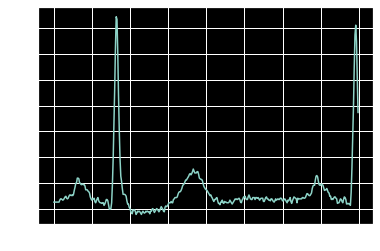

In [148]:
plt.plot(df_signals.iloc[1,:400])

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

# pan-tompkins 알고리즘

# low-pass filter
def lpf(x, ind, fromsamp, tosamp):
    x = x.loc[ind, fromsamp:tosamp]
    y = x.copy()

    for n in range(len(y)):
        if(n < 12):
            continue
        y[fromsamp+n] = 2*y[fromsamp+n-1] - y[fromsamp+n-2] + x[fromsamp+n] - 2*x[fromsamp+n-6] + x[fromsamp+n-12]
    return y

# high-pass filter
def hpf(x):
	y = x.copy()
	
	for n in range(y.index[0],len(x)+y.index[0]):
		if(n < y.index[0]+32):
			continue
		y[n] = y[n-1] - x[n]/32 + x[n-16] - x[n-17] + x[n-32]/32
	return y

# defivative of signal
def deriv(x):
	y = x.copy()

	for n in range(y.index[0],y.index[0]+len(x)):
		if(n < y.index[0]+4):
			continue
		y[n] = (2*x[n] + x[n-1] - x[n-3] - 2*x[n-4])/4
	return y

# squarring the signal
def squaring(x):
	y = x.copy()

	for n in range(y.index[0], y.index[0]+len(x)):
		y[n] = x[n]**2
	return y

# integral of the signal for a moving window of ws size.
def win_sum(x, ws):
	y = x.copy()
	l = int(ws/2)
	
	for n in range(y.index[0], y.index[0]+len(x)):
		tmp_sum = 0
		
		if(n > y.index[0]+len(x)-1-l):
			break

		if(n < y.index[0]+l):
			continue
		for j in range(n-l,n+l+1):
			tmp_sum += x[j]
		y[n] = tmp_sum/(l+1)		
	return y

def pan_tompkins(x, ind, fromsamp, tosamp, ws):
    f1 = lpf(x, ind, fromsamp, tosamp)
    f2 = hpf(f1)
    f3 = deriv(f2)
    f4 = squaring(f3)
    f5 = win_sum(f4, ws)
    return f5

In [150]:
ecg = df_signals
# Application of lpf
f1 = lpf(ecg, '101', 0, int(len(ecg.columns)/100))
# Application of hpf
f2 = hpf(f1)
# Application of the derivative
f3 = deriv(f2)
# squaring signal
f4 = squaring(f3)

window_size = 22 
f5 = win_sum(f4, window_size)

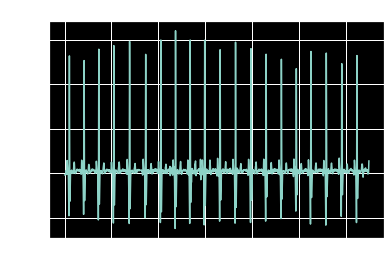

In [152]:
f2[:int(len(ecg.columns)/10)].plot()
plt.title('Band-pass Filtering')
plt.xlabel('time')
plt.ylabel('mV')
plt.plot()
plt.show()

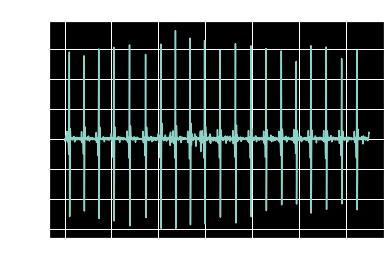

In [153]:
f3[:].plot()
plt.title('Derivative')
plt.xlabel('time')
plt.ylabel('mV')
plt.show()

Text(0, 0.5, 'mV')

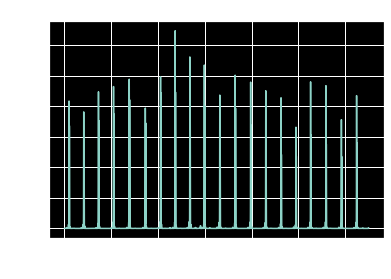

In [154]:
f4[:].plot()
plt.title('Squarring')
plt.xlabel('time')
plt.ylabel('mV')

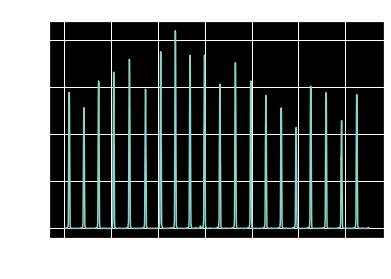

In [155]:
f5[:].plot()
plt.title('Pan-Tompkins algorithm')
plt.xlabel('time')
plt.ylabel('mV')
plt.show()

In [156]:
# peak 검출 알고리즘 구축

def peak_detection(x, interval, threshold):
    time = x.index[0]
    peak_points = []
    threshold = 75
    # interval 구간동안 임계점 이상의 값을 갖는 점이 나타나지 않을 경우 다음 step으로
    while time < x.index[0]+len(x)-interval:
        if x[time] < threshold : 
            time += 1
        else : 
            peak_points.append(x.loc[time:time+interval].idxmax())
            time += interval
            peak_inds = list(set(peak_points))
            peak_inds.sort()
            
    return peak_inds


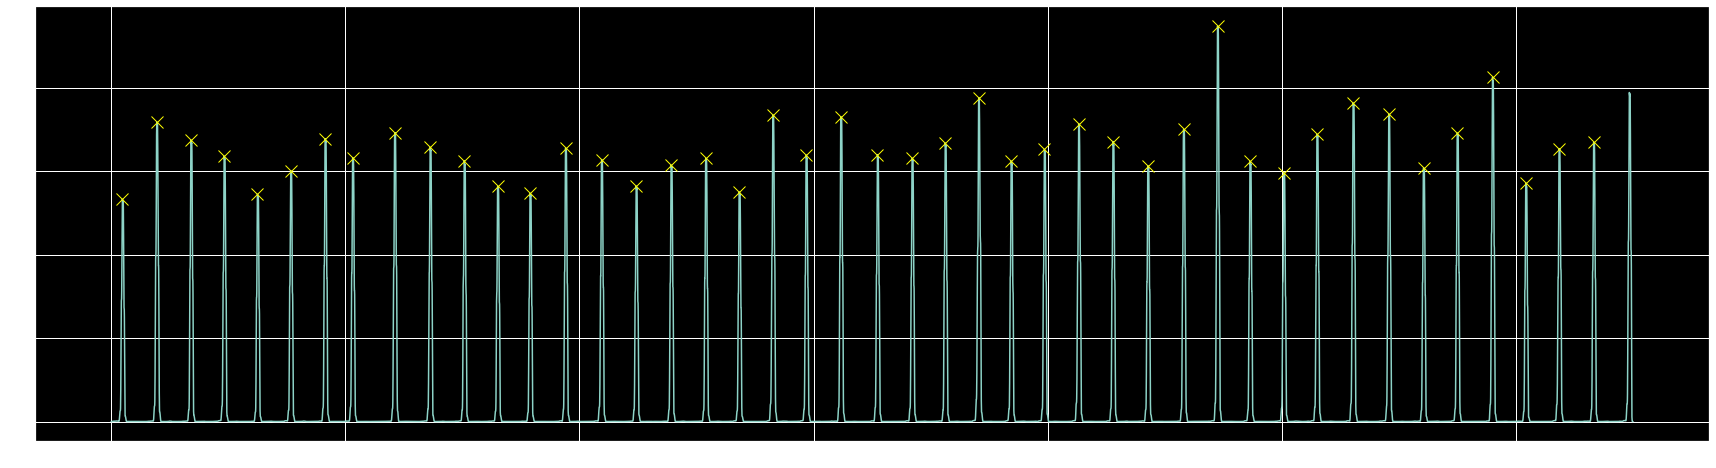

In [159]:
plt.figure(figsize=(30,8))
plt.plot(sig_100)
plt.plot(peak_inds, sig_100[peak_inds], 'yx', marker='x', 
         color='#ffff00', label='Peak', markersize=12)

plt.show()

In [161]:
# pan-tompkins 알고리즘으로 100번 환자 시그널 피크 검출
sig_100 = pan_tompkins(df_signals, '100', 0, len(df_signals.columns), 22)
peak_inds = peak_detection(sig_100, 50, 75)

In [162]:
def Tach_Brady_Detection(peak_inds, fs, tachy_time, brady_time):
    tachycardia_list = []
    bradycardia_list = []
    for i in range(1, len(peak_inds)):     
        if peak_inds[i] - peak_inds[i-1] < fs * tachy_time:
            tachycardia_list.append(peak_inds[i])
        elif peak_inds[i] - peak_inds[i-1] > fs * brady_time:
            bradycardia_list.append(peak_inds[i])
    return tachycardia_list, bradycardia_list

In [163]:
# 이전비트 이후로 0.6초보다 더 빨리 뛰면 빈맥, 1초보다 더 늦게 뛰면 서맥으로 판단
tachycardia_ind_list, bradycardia_ind_list = Tach_Brady_Detection(peak_inds, 360, 0.6, 1)
print(tachycardia_ind_list, bradycardia_ind_list)

[66817, 99604, 128108, 279601, 305728, 319242, 346823, 351500, 397360, 422838, 433866, 436174, 454676, 496732, 521001, 546815, 567400, 593087, 629195] [2428, 313215, 318165, 319606, 397724, 434231, 443012, 497094, 547219]


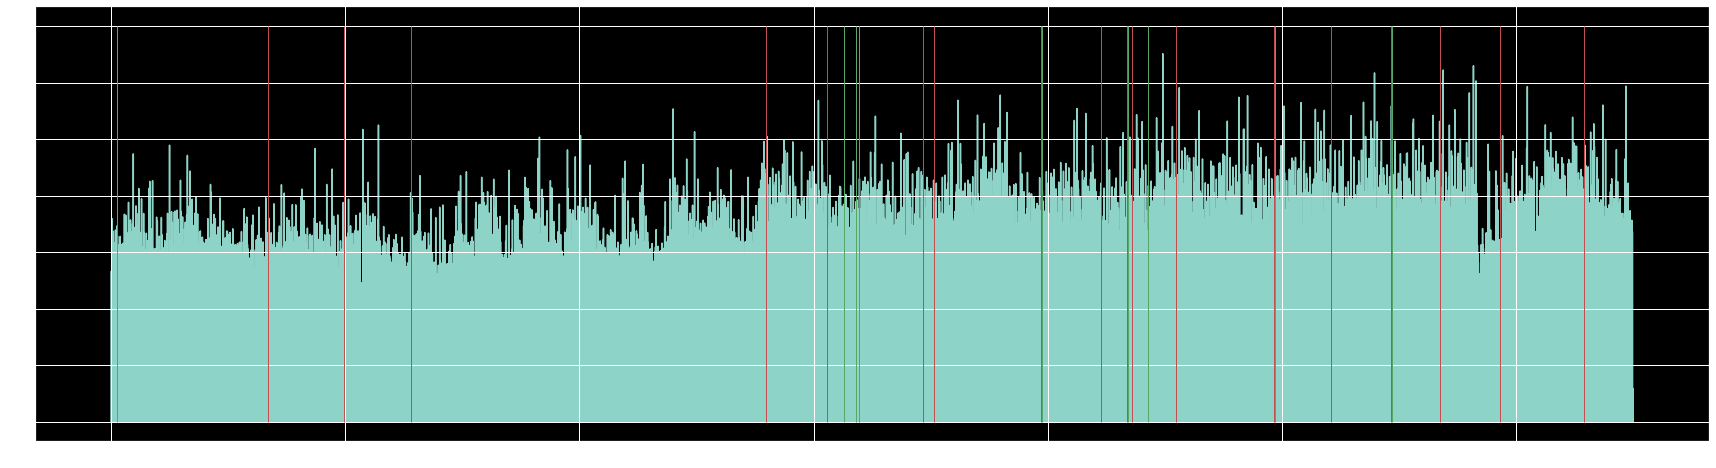

In [164]:
# 초록색 수직선은 검출된 서맥, 붉은색 수직선은 검출된 빈맥 부분
plt.figure(figsize=(30,8))

plt.vlines(x=tachycardia_ind_list, ymin=0, ymax=350, linewidth=1, color='r', zorder=1)
plt.vlines(x=bradycardia_ind_list, ymin=0, ymax=350, linewidth=1, color='g', zorder=1)
plt.plot(sig_100, zorder=0)

In [165]:
annotation = wfdb.rdann('100', 'atr', sampfrom=0, sampto=650000, pn_dir='mitdb')

# 제거된 timestamp를 제외한 부분의 annotation을 읽음
df_ann_100 = pd.DataFrame([annotation.symbol], columns = annotation.sample)
df_ann_100

,18,77,370,662,946,1231,1515,1809,2044,2402,2706,2998,3282,3560,3862,4170,4466,4764,5060,5346,5633,5918,6214,6527,6823,7106,7391,7670,7953,8245,8539,8837,9141,9431,9710,9998,10282,10591,10894,11191,11480,11781,12066,12350,12645,12949,13266,13562,13842,14131,14423,14710,15011,15310,15607,15899,16183,16464,16755,17058,...,633768,634028,634283,634545,634826,635107,635394,635684,635966,636238,636520,636811,637105,637399,637704,637997,638282,638560,638846,639140,639446,639744,640039,640329,640615,640900,641178,641479,641777,642065,642337,642614,642887,643164,643439,643721,644005,644286,644547,644807,645063,645320,645581,645863,646132,646393,646658,646916,647168,647414,647672,647934,648203,648477,648733,648978,649232,649484,649734,649991
0,+,N,N,N,N,N,N,N,A,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [166]:
# 비정상적인 부분의 annotation
sr_ann_abnormal_100 = df_ann_100.loc[0,df_ann_100.iloc[0,:] != 'N']
df_ann_abnormal_100 = pd.DataFrame(sr_ann_abnormal_100).T
df_ann_abnormal_100

,18,2044,66792,74986,99579,128085,170719,279576,305709,307745,312825,317785,319223,346804,351481,377081,397335,421994,422818,433841,436149,442623,444705,454651,458168,496712,520982,546792,562812,566259,567379,574429,579448,593068,629171
0,+,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,V,A,A,A,A,A,A,A


In [167]:
df_ann_abnormal_100.iloc[0,:].value_counts()

A    33
+     1
V     1
Name: 0, dtype: int64

In [168]:
# 심장 조기박동 데이터만 추출
df_ann_premature_beat_100 = df_ann_abnormal_100[df_ann_abnormal_100 == 'A'].dropna(axis=1)
df_ann_premature_beat_100

,2044,66792,74986,99579,128085,170719,279576,305709,307745,312825,317785,319223,346804,351481,377081,397335,421994,422818,433841,436149,442623,444705,454651,458168,496712,520982,562812,566259,567379,574429,579448,593068,629171
0,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A


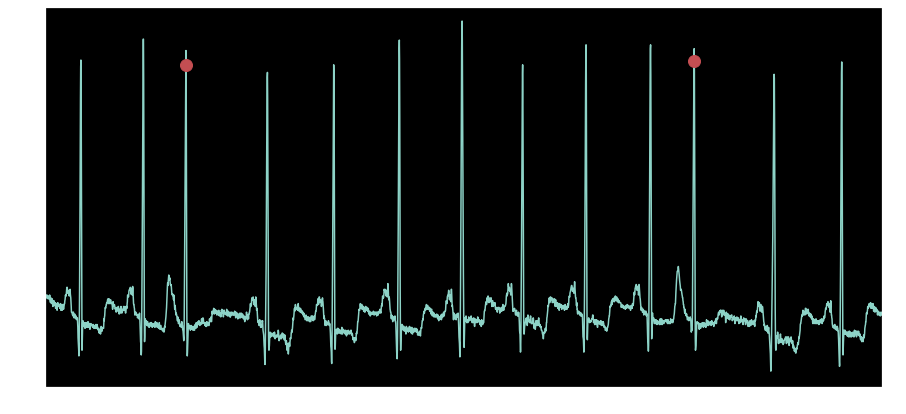

In [169]:
# 확대해서 보면 다른 비트보다 빠르게 beat가 기록된 것을 볼 수 있음
plt.figure(figsize=(15,7))
plt.plot(range(432000,440001),df_signals.loc['100',432000:440000])
plt.plot(list(df_ann_premature_beat_100), df_signals.loc['100',:][list(df_ann_premature_beat_100)], 'ro', markersize=12)
plt.ylim((-0.7,1.3))
plt.xlim((433200,437001))
plt.grid(False)

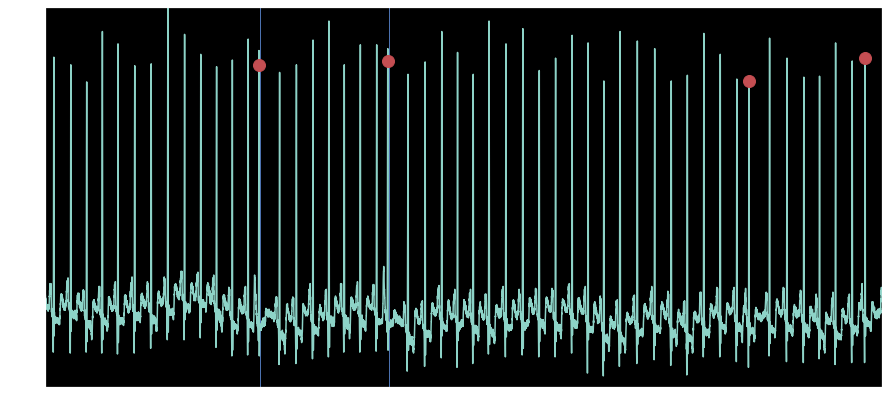

In [170]:
# 빨간 점은 annotation 데이터에서 심방 조기수축이 일어나는 부분
# 파란 선은 pan-tompkins 알고리즘으로 구별한 빈맥 부분
plt.figure(figsize=(15,7))

plt.plot(range(430000,445001),df_signals.loc['100',430000:445000])
plt.plot(list(df_ann_premature_beat_100), df_signals.loc['100',:][list(df_ann_premature_beat_100)], 'ro', markersize=12)
plt.vlines(x=tachycardia_ind_list, ymin=-1, ymax=2, linewidth=1, color='b', zorder=1)
plt.ylim((-0.7,1.3))
plt.xlim((430000,445000))
plt.grid(False)

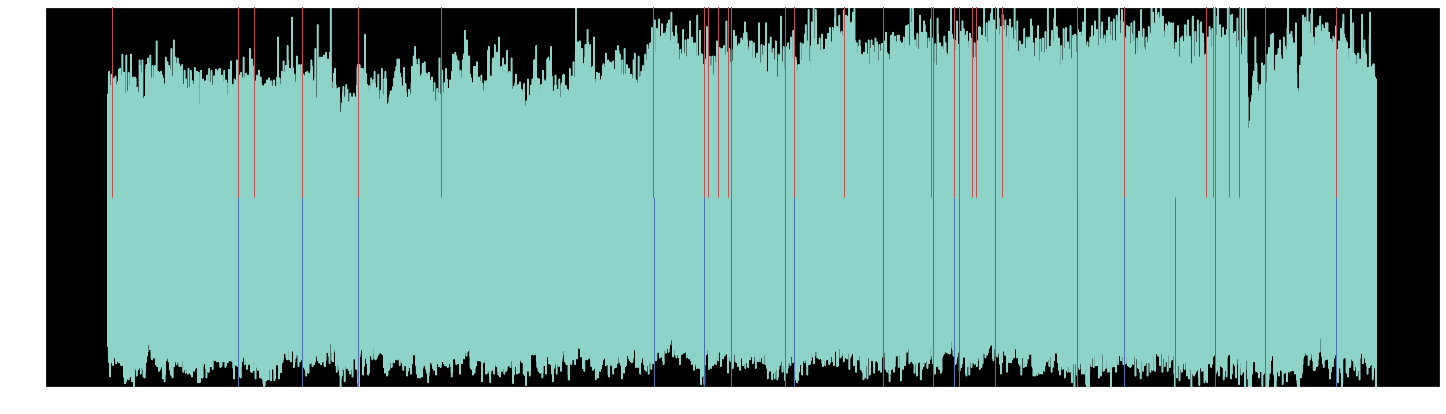

In [171]:
# 위쪽 빨간 선은 annotation 데이터에서 심방 조기수축이 일어나는 부분
# 아랫쪽 파란 선은 pan-tompkins 알고리즘으로 구별한 빈맥 부분
plt.figure(figsize=(25,7))

plt.plot(range(649999),df_signals.loc['100',:])
plt.vlines(x=list(df_ann_premature_beat_100), ymin=0.3, ymax=2, linewidth=1, color='r', zorder=3)
plt.vlines(x=tachycardia_ind_list, ymin=-1, ymax=0.3, linewidth=1, color='b', zorder=3)
plt.ylim((-0.7,1.3))
#plt.xlim((430000,445000))
plt.grid(False)

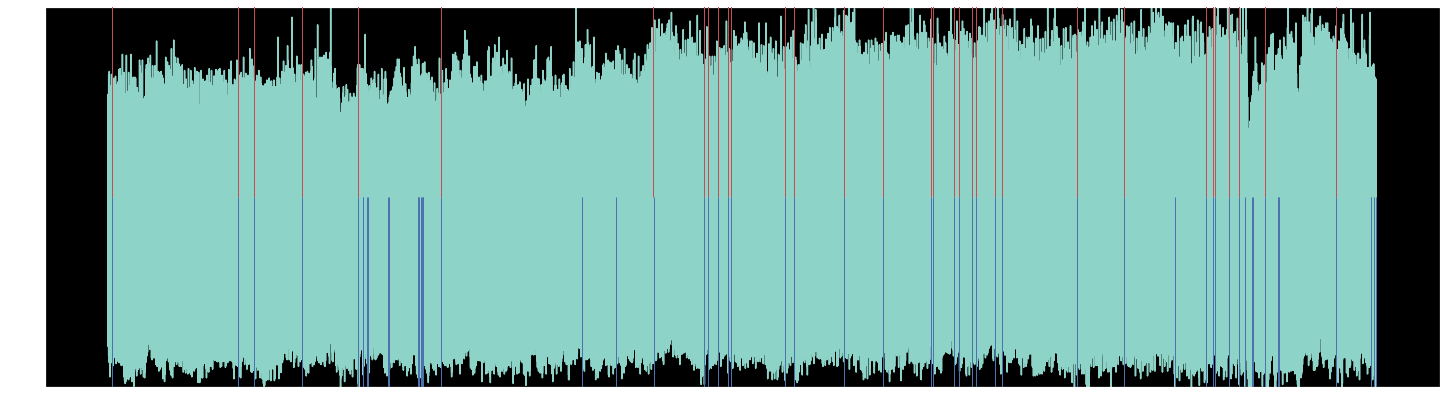

In [172]:
# 빈맥을 덜 검출하였기 때문에 빈맥을 판단하는 기준을 0.6초에서 0.7초로 완화
tachycardia_ind_list_2, bradycardia_ind_list = Tach_Brady_Detection(peak_inds, 360, 0.7, 1)
plt.figure(figsize=(25,7))

plt.plot(range(649999),df_signals.loc['100',:])
plt.vlines(x=list(df_ann_premature_beat_100), ymin=0.3, ymax=2, linewidth=1, color='r', zorder=3)
plt.vlines(x=tachycardia_ind_list_2, ymin=-1, ymax=0.3, linewidth=1, color='b', zorder=3)
plt.ylim((-0.7,1.3))
#plt.xlim((430000,445000))
plt.grid(False)

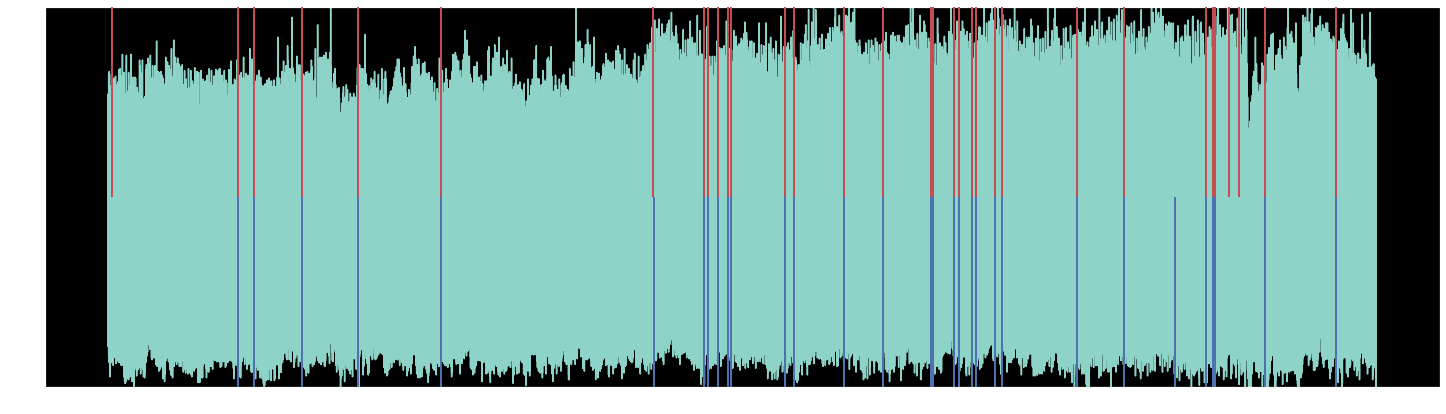

In [193]:
# 지나치게 많이 빈맥을 검출하였기 때문에 빈맥 판단 기준을 0.65초로 다시 제한

tachycardia_ind_list_3, bradycardia_ind_list = Tach_Brady_Detection(peak_inds, 360, 0.65, 1)
plt.figure(figsize=(25,7))

plt.plot(range(649999),df_signals.loc['100',:])
plt.vlines(x=list(df_ann_premature_beat_100), ymin=0.3, ymax=2, linewidth=2, color='r', zorder=3)
plt.vlines(x=tachycardia_ind_list_3, ymin=-1, ymax=0.3, linewidth=2, color='b', zorder=3)
plt.ylim((-0.7,1.3))
#plt.xlim((430000,445000))
plt.grid(False)

In [190]:
# annotation에 기록된 심방 조기수축 기록을 기준으로, 알고리즘으로 검출한 조기수축 기록의 정확도를 채점
# 만약 주어진 beat 안에 검출해낸 빈맥이 있을 경우 TP += 1
def evaluate(annotation_list, algorithm_list):
    TP = 0
    for time1 in annotation_list:
        for time2 in algorithm_list:
            if time2 in range(time1-85, time1+180):
                TP += 1
    FN = len(annotation_list.columns) - TP
    FP = len(algorithm_list) - TP
    precision = TP/(TP+FN+FP)
    recall = TP/(FN+TP)
    return precision, recall, TP, FP, FN

In [192]:
print('precision : '+ str(round(evaluate(df_ann_premature_beat_100, tachycardia_ind_list_3)[0] * 100,2))+'%')
print('recall : '+ str(round(evaluate(df_ann_premature_beat_100, tachycardia_ind_list_3)[1] * 100,2))+'%')

precision : 88.24%
recall : 90.91%
